In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 数据加载

In [2]:
#数据加载
dataset=pd.read_csv('SupplyChain.csv')#这里是数据读取编码的问题  需要处理一下 
dataset#'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte  

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte

In [3]:
dataset=pd.read_csv('SupplyChain.csv',encoding='unicode_escape')#这样数据就读取进来了  
dataset#字段太多了 50多个字段  我们需要找到我们有用的字段  有专门的文件解释字段  需要先了解清楚

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


# 数据探索

In [6]:
print(len(dataset.columns))
dataset.columns#一共有53个字段  下面是字段的名字   其中我们的目标是要将用户（客户ID）按照RFM模型 进行分类 划分成为8个层次

53


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
dataset["Customer Id"].value_counts()

5654     47
5004     45
10591    45
5715     44
3708     44
         ..
13486     1
17887     1
15952     1
13905     1
14375     1
Name: Customer Id, Length: 20652, dtype: int64

In [8]:
dataset["Customer Id"]#数据好像有 180519个订单  但是用户是20652个

0         20755
1         19492
2         19491
3         19490
4         19489
          ...  
180514     1005
180515     9141
180516      291
180517     2813
180518     7547
Name: Customer Id, Length: 180519, dtype: int64

# 数据预处理

In [11]:
#看看数据是否有缺失值
dataset.isnull().sum()#从这里可以看出来 有缺失值 
#Customer Lname 有8个缺失值   Customer Zipcode 有3个缺失值   Order Zipcode有155679个缺失值  Product Description有180519个缺失值

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [20]:
#数据有缺失值  但是怎么填充比较合适呢  需要对相应的数据进行 探索 然后做填充的方法
# Customer Zipcode 是客户所在邮编   我觉得可以通过客户所在街道Customer Street来填充吧   毕竟同一个街道的话 邮编大概率是相同的
temp_CZ=dataset['Customer Zipcode'].isnull()
temp_CZ

0         False
1         False
2         False
3         False
4         False
          ...  
180514    False
180515    False
180516    False
180517    False
180518    False
Name: Customer Zipcode, Length: 180519, dtype: bool

In [23]:
temp_CZ[temp_CZ==True].index#这样就把缺失值所在索引给拿出来了 

Int64Index([35704, 46440, 82511], dtype='int64')

In [25]:
dataset['Customer Street'][temp_CZ[temp_CZ==True].index]#这样就拿到了对应的索引所在街道 然后我们看看 Elk Grove 和 El Monte 的邮编是多少

35704    Elk Grove
46440    Elk Grove
82511     El Monte
Name: Customer Street, dtype: object

In [37]:
dataset[dataset['Customer Street']=='Elk Grove'].index#我是想通过dataset然后通过索引来找到Elk Grove的值  值找出来了两个 刚好就是确实的那两个

Int64Index([35704, 46440], dtype='int64')

In [40]:
temp_cx=dataset['Customer Street'].value_counts()#对Customer Street进行一下探索
temp_cx

9126 Wishing Expressway     122
4388 Burning Goose Ridge    117
4720 Noble Hills Wynd       116
2878 Hazy Wagon  Thicket    113
398 Emerald Grove           109
                           ... 
8428 Blue Prairie Farm        1
4691 Cinder Crest             1
409 Iron Park                 1
4696 Red Wharf                1
8933 Dewy Quay                1
Name: Customer Street, Length: 7458, dtype: int64

In [41]:
temp_cx['Elk Grove']#太天真了 原来Elk Grove只有两个 刚好是缺失的那两个    要是不缺失 早就通过街道查出邮编了

2

In [42]:
temp_cx['El Monte']#同样 这个这么这么巧  只有一个

1

In [43]:
#对dataset['Customer Zipcode']采用众数填补
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0],inplace=True)
dataset['Customer Zipcode'].isnull().sum()#填充完之后 就没有缺失值了

0

<AxesSubplot:>

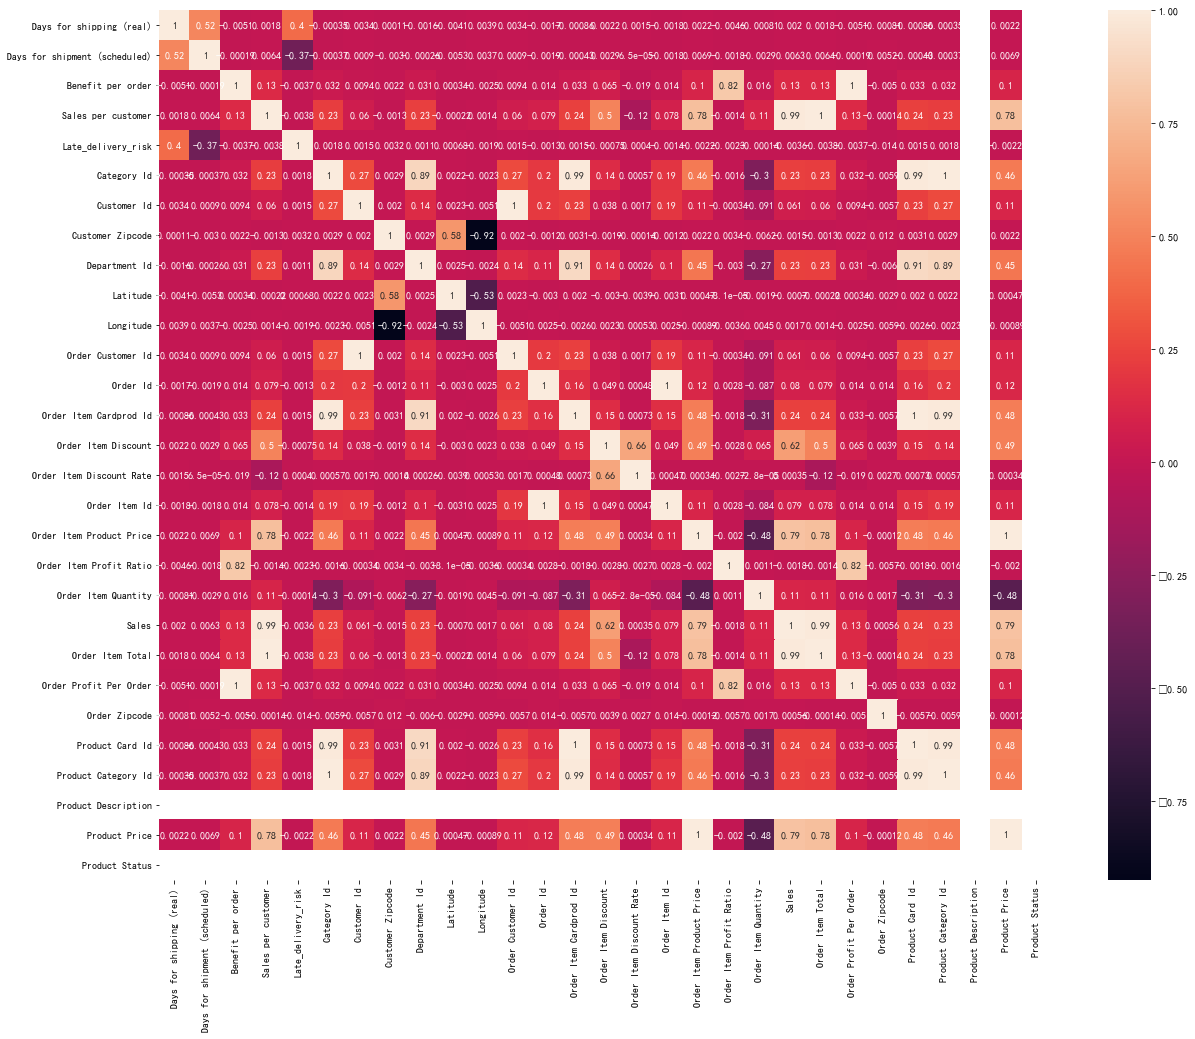

In [46]:
plt.figure(figsize=(20,16))
data=dataset
sns.heatmap(data.corr(),annot=True)#把相关性可视化一下

In [48]:
data.isnull().sum()#还有缺失值  但是感觉是无关紧要的值 都是object类型

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


# 相关指标可视化探索

In [49]:
# 对于销售额进行探索（对应 Sales per customer） # 按照不同的Market, Order Region 
# 按照不同的Category Name # 按照不同的时间维度（年，月，星期，小时）的趋势 # Product Price与Sales per customer 相关性如何
#看一下 Market, Order Region 之间的关系 
data[['Sales per customer','Market']]

,Sales per customer,Market
0,314.640015,Pacific Asia
1,311.359985,Pacific Asia
2,309.720001,Pacific Asia
3,304.809998,Pacific Asia
4,298.250000,Pacific Asia
...,...,...
180514,399.980011,Pacific Asia
180515,395.980011,Pacific Asia
180516,391.980011,Pacific Asia
180517,387.980011,Pacific Asia


In [52]:
data['Market'].value_counts()#一共就只有5加超市

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

<AxesSubplot:title={'center':'不同的market中的Sales'}, xlabel='Market'>

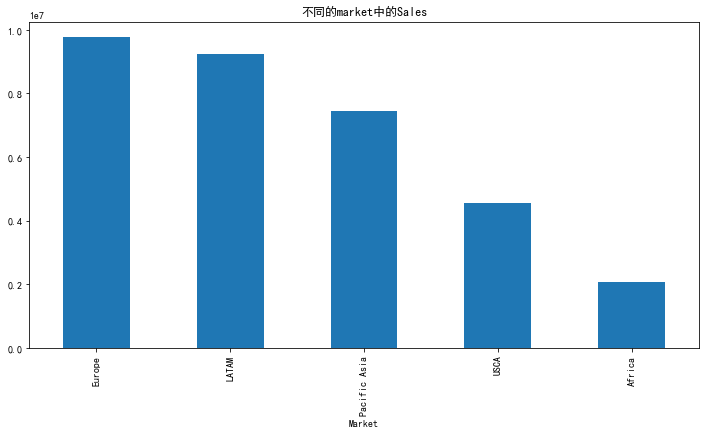

In [50]:
#基于market进行聚合
market=data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='不同的market中的Sales')

<AxesSubplot:title={'center':'不同的Order Region中的Sales'}, xlabel='Order Region'>

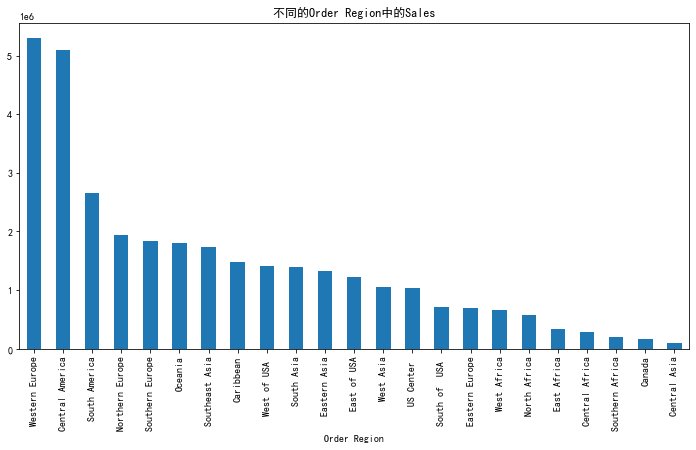

In [99]:
#同理按照不同的 Order Region 进行聚合可视化
Region=data.groupby('Order Region')
Region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='不同的Order Region中的Sales')

<AxesSubplot:title={'center':'不同的Category Name中的Sales'}, xlabel='Category Name'>

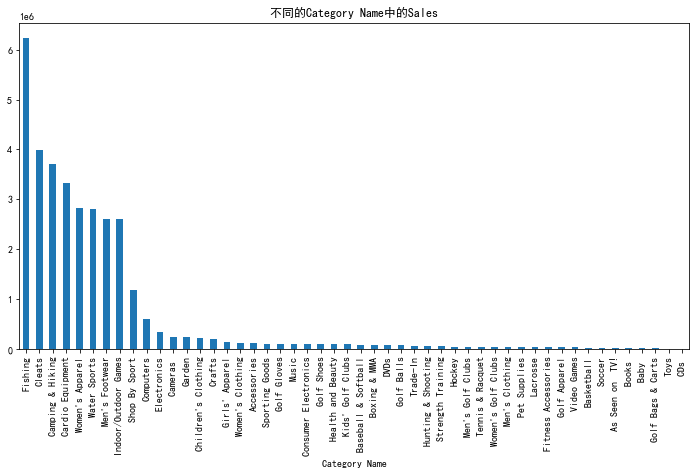

In [54]:
# Category Name也进行一下聚合操作
cat=data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='不同的Category Name中的Sales')

<AxesSubplot:title={'center':'不同的Category Name中的Sales均值'}, xlabel='Category Name'>

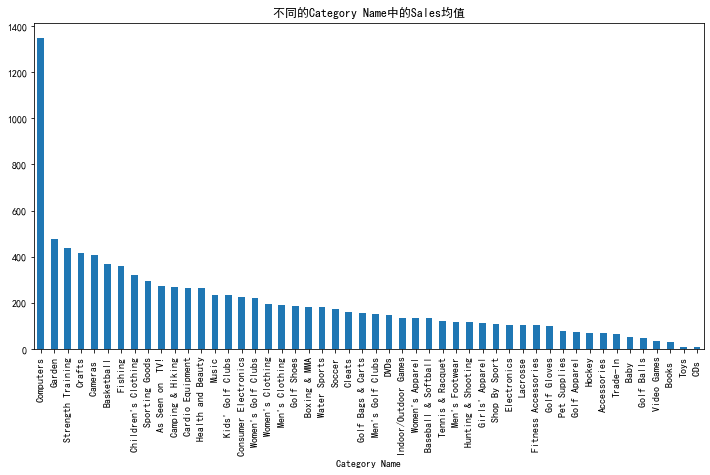

In [55]:
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title='不同的Category Name中的Sales均值')

In [59]:
# 按照不同的时间维度（年，月，星期，小时）的趋势
temp=pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [60]:
#取出  order date (DateOrders) 中的year month weekday hour
data['order_year']=temp.year
data['order_month']=temp.month
data['order_weekday']=temp.weekday
data['order_hour']=temp.hour
data#data里面就添加出了几个字段 order_year	order_month	order_weekday	order_hour

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_weekday,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,2018,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,N

<AxesSubplot:title={'center':'每小时的平均销售额'}, xlabel='order_hour'>

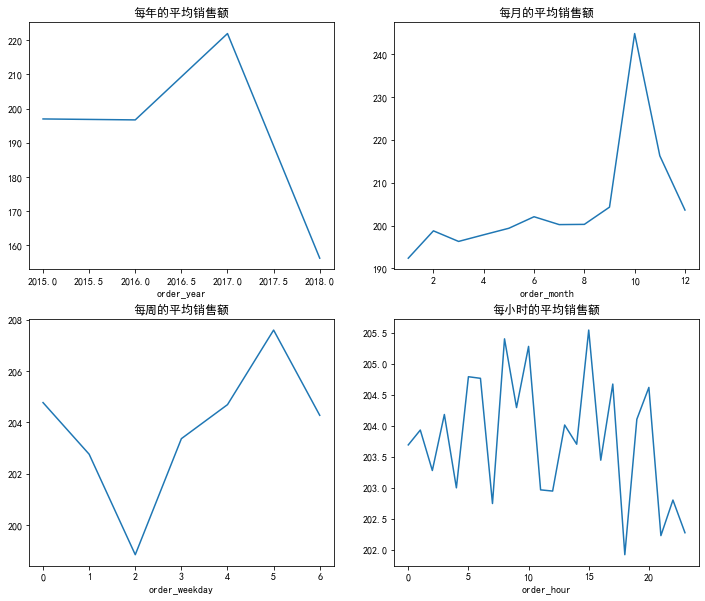

In [61]:
#对销售额进行探索  在不同的时间尺度
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_year=data.groupby('order_year')#先按照order_year进行聚合
df_year['Sales'].mean().plot(title='每年的平均销售额')

plt.subplot(2,2,2)
df_month=data.groupby('order_month')#先按照order_year进行聚合
df_month['Sales'].mean().plot(title='每月的平均销售额')

plt.subplot(2,2,3)
df_weekday=data.groupby('order_weekday')#先按照order_year进行聚合
df_weekday['Sales'].mean().plot(title='每周的平均销售额')

plt.subplot(2,2,4)
df_hour=data.groupby('order_hour')#先按照order_year进行聚合
df_hour['Sales'].mean().plot(title='每小时的平均销售额')

### 用户分层RFM

In [63]:
#上面那个order date (DateOrders) 是 订单下单日期（精确到分钟，比如 1/31/2018 22:56） 先转成dataframe里面的标准格式
data['order date (DateOrders)']=pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [64]:
#这样转换以后可以看到 最后一笔订单的下单时间
data['order date (DateOrders)'].max()#时间中的最大值就是最后一笔订单的下单时间

Timestamp('2018-01-31 23:38:00')

In [66]:
#假设当前的时间是2018-2-1
import datetime
now=datetime.datetime(2018,2,1)
now

datetime.datetime(2018, 2, 1, 0, 0)

In [91]:
#计算每个用户的RFM的指标
customer_seg=data.groupby('Customer Id').agg({'order date (DateOrders)':lambda x:(now-x.max()).days,
                                              'Order Id':lambda x:len(x),'Sales':lambda x:x.sum()
                                             })
customer_seg  #R最近一次消费时间间隔  F消费频率  M消费金额  就是下面准备的这三个字段 

,order date (DateOrders),Order Id,Sales
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [92]:
customer_seg.rename(columns={'order date (DateOrders)':'R_value','Order Id':'F_value','Sales':'M_value'},inplace=True)
customer_seg#改个名字

,R_value,F_value,M_value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [93]:
#将RFM数据划分为2个尺度
quantiles=customer_seg.quantile(q=[0.5])
quantiles=quantiles.to_dict()
quantiles

{'R_value': {0.5: 159.0},
 'F_value': {0.5: 7.0},
 'M_value': {0.5: 1499.82503324}}

In [94]:
#R_value越小越好  对应的R_score就越大
def R_Score(x,b,c):
    if x<c[b][0.5]:
        return 2
    else :
        return 1

#F和M指标都是一样的 越大越好
def RM_Score(x,b,c):
    if x>c[b][0.5]:
        return 2
    else: 
        return 1

In [95]:
#创建 R_Score,用于将R_value映射成[1,2]
customer_seg['R_Score']=customer_seg['R_value'].apply(R_Score,args=('R_value',quantiles))
customer_seg['F_Score']=customer_seg['F_value'].apply(RM_Score,args=('F_value',quantiles))
customer_seg['M_Score']=customer_seg['M_value'].apply(RM_Score,args=('M_value',quantiles))
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,499.950012,1,1,1
2,136,10,1819.730034,2,2,2
3,229,18,3537.680094,1,2,2
4,380,14,1719.630030,1,2,2
5,457,7,1274.750023,1,1,1
...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1
20754,0,1,215.820007,2,1,1
20755,0,1,327.750000,2,1,1


In [96]:
#计算RFM的分层
def RFM_user(df):
    if df['M_Score']==2 and df['F_Score']==2 and df['R_Score']==2:
        return "重要价值用户"
    if df['M_Score']==2 and df['F_Score']==1 and df['R_Score']==2:
        return "重要发展用户" 
    if df['M_Score']==2 and df['F_Score']==2 and df['R_Score']==1:
        return "重要保持用户"
    if df['M_Score']==2 and df['F_Score']==1 and df['R_Score']==1:
        return "重要价值用户"
    
    if df['M_Score']==1 and df['F_Score']==2 and df['R_Score']==2:
        return "一般价值用户"
    if df['M_Score']==1 and df['F_Score']==1 and df['R_Score']==2:
        return "一般发展用户" 
    if df['M_Score']==1 and df['F_Score']==2 and df['R_Score']==1:
        return "一般保持用户"
    if df['M_Score']==1 and df['F_Score']==1 and df['R_Score']==1:
        return "一般价值用户"

In [97]:
customer_seg['Customer_Type']=customer_seg.apply(RFM_user,axis=1)
customer_seg#这样就完成了用户的RFM分层

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Customer_Type
Customer Id,,,,,,,
1,792,1,499.950012,1,1,1,一般价值用户
2,136,10,1819.730034,2,2,2,重要价值用户
3,229,18,3537.680094,1,2,2,重要保持用户
4,380,14,1719.630030,1,2,2,重要保持用户
5,457,7,1274.750023,1,1,1,一般价值用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1,一般发展用户
20754,0,1,215.820007,2,1,1,一般发展用户
20755,0,1,327.750000,2,1,1,一般发展用户
